# Metric Design 

In this exercice we are going get a first glimpse on Olist's business health

In [1]:
#load modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
from olist.data import Olist
data = Olist().get_data()

## 1 - Orders vs. Reviews?

___
❓Plot a histogram of `review_score`. How many valid reviews do we have in total?

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_score', ylabel='count'>

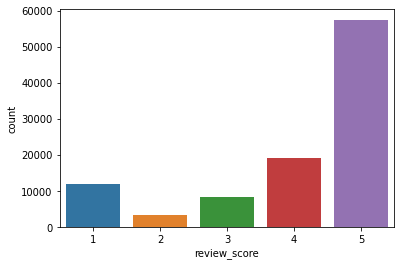

In [3]:
sns.countplot(data['order_reviews']['review_score'])

In [4]:
print(len(data['order_reviews']['review_score'])) # total
data['order_reviews']['review_score'].count() # number of non null

100000


100000

___
❓ Plot a histogram of `order_status`
- We already know from our data schema that each `review` has a unique `order`.
- Do all `orders` have a `review`?

<details>
    <summary>Hint</summary>

You can use `pd.Series.isna().sum()` to count the number of NaN values in a series
</details>

/home/florent/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_status', ylabel='count'>

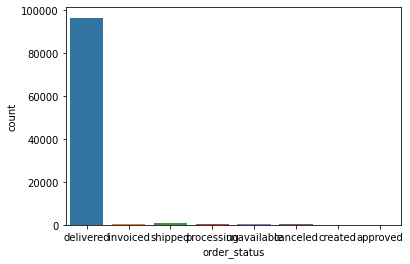

In [5]:
sns.countplot(data['orders']['order_status'])

In [6]:
len(data['orders'])

99441

In [7]:
data['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [8]:
# Check if each order has a review
joint = data['orders'].merge(data['order_reviews'], on='order_id', how='outer')
joint['review_score'].isna().sum()

0

In [9]:
# Double check :) 
joint.groupby(['order_status'])['review_score'].apply(lambda s: s.isna().sum())

order_status
approved       0
canceled       0
created        0
delivered      0
invoiced       0
processing     0
shipped        0
unavailable    0
Name: review_score, dtype: int64

☝️ The Olist Dataset seems to have already been filtered to only contain orders with review.

## 2 - Evolution of key business metrics over the past 14 months

Metrics 
- Which metric would you use as key business output metric of Olist? 
- Which metric would you use to measure that a customer had a good experience with Olist? 
- Which metric would you use to measure shipping delay?
- For each metric, plot a trend line over time.

### Metric 1: Order numbers

First, plot numbers of weekly total orders (to check how is the business going)  
Then, plot also the weekly number of non-delivered orders (to check if no issue is visible)
<details>
    <summary>Hint</summary>
    
    
Make sure to convert dates to python `datetime` objects  
Make use of pandas's native handling of `datetime` objects, using `pandas.Series.resample()`
</details>

In [11]:
# Order numbers
orders = data['orders'].copy()
# handle datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp')

In [12]:
orders.sort_index()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
2016-09-13 15:24:19,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00
...,...,...,...,...,...,...,...
2018-09-29 09:13:03,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,NaN,NaN,NaN,2018-10-15 00:00:00
2018-10-01 15:30:09,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,NaN,NaN,NaN,2018-10-23 00:00:00
2018-10-03 18:55:29,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,NaN,NaN,NaN,2018-10-16 00:00:00


Text(0.5, 1.0, 'weekly orders (total)')

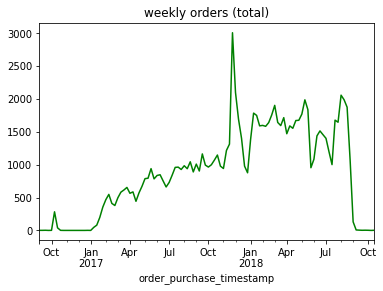

In [4]:
# plot numbers of monthly orders purchased
orders.resample('W')['order_id'].count().plot(color='g')
plt.title('weekly orders (total)')

Text(0.5, 1.0, 'weekly non-delivered orders')

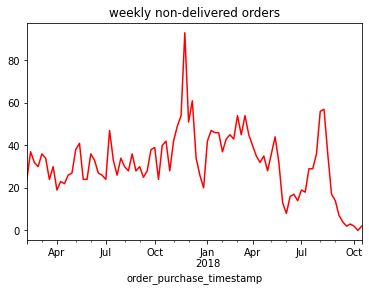

In [27]:
orders.query("order_status != 'delivered'").loc['2017-02-01':].resample('W')['order_id'].count().plot(color='r')
plt.title('weekly non-delivered orders')

### Metric 1-bis (optional): Total payment values
Instead of a number of orders, look at the weekly sum of `payment_value` in `BRL` to get a proxy of Olist's weekly revenues

In [207]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [29]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)
order_ids_payments.head()

,order_payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [32]:
# Merge with orders dataset to get the date
orders_payments = data['orders'].merge(order_ids_payments, on='order_id')

In [33]:
# handle datetime
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']: 
    orders_payments[col] = pd.to_datetime(orders_payments[col])
orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62


Text(0.5, 1.0, 'Weekly orders values')

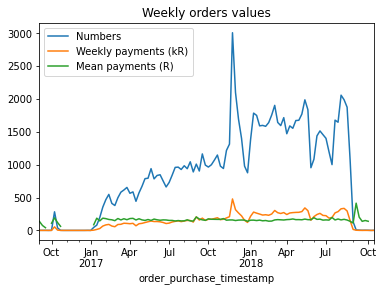

In [34]:
# plot numbers of weekly orders purchased
weekly_orders_payments = orders_payments.set_index('order_purchase_timestamp').resample('W')
weekly_orders_payments.count()['order_id'].plot(label='Numbers')
weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000).plot(label='Weekly payments (kR)')
weekly_orders_payments.mean()['order_payment_value'].plot(label = 'Mean payments (R)')
plt.legend()
plt.title('Weekly orders values')

### Metric 2: Customer Satisfaction
Plot monthly customer satisfaction, as mean review_score

In [13]:
reviews = data['order_reviews'].copy()

In [14]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
# handle datetime
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)

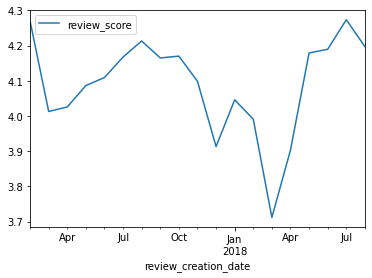

In [28]:
reviews.loc['2017-02-01':].resample('M').agg({'review_score':'mean'}).plot()

### Metric 3: Shipping delay

❓Create a two new metrics `delay_vs_expected` and `wait_time` in **days**, from the `orders` dataset, and plot their historical evolution in weekly means to check for any noticeable trends

<details>
    <summary>Hint</summary>

    
Ask StackOverflow to help you compute differences between two `datetime` in python!
</details>

In [14]:
orders = orders.query("order_status=='delivered'").reset_index()

orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [15]:
orders['delay_vs_expected'] = (orders['order_estimated_delivery_date'] -\
                               orders['order_delivered_customer_date']) / np.timedelta64(24, 'h')

In [16]:
orders['wait_time'] = (orders['order_delivered_customer_date'] -\
                       orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')

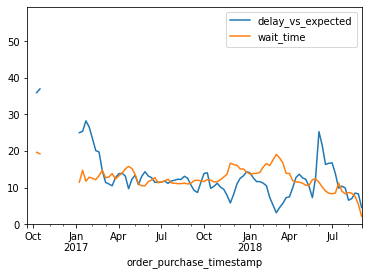

In [17]:
orders.set_index('order_purchase_timestamp').resample('W')[['delay_vs_expected', 'wait_time']].mean().plot()
plt.ylim(ymin=0);

☝️ There seems to have been two difficult period in the

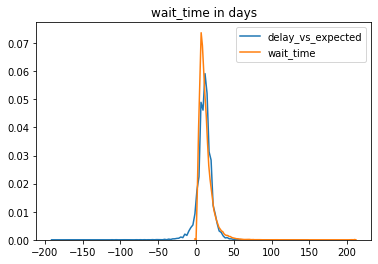

In [40]:
sns.kdeplot(orders['delay_vs_expected'])
sns.kdeplot(orders['wait_time'])
plt.title('wait_time in days')
plt.legend()

In [60]:
orders['wait_time'].describe()

count    96455.000000
mean        12.557693
std          9.545982
min          0.533414
25%          6.765498
50%         10.216227
75%         15.720145
max        209.628611
Name: wait_time, dtype: float64

In [45]:
orders['delay_vs_expected'].describe()

count    96455.000000
mean        11.176795
std         10.183950
min       -188.975081
25%          6.389109
50%         11.945069
75%         16.243773
max        146.016123
Name: delay_vs_expected, dtype: float64